In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

(50, 140)

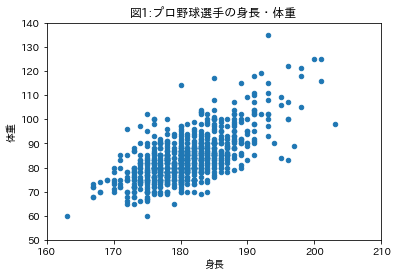

In [2]:
# プロ野球選手データの散布図を描画
baseball = pd.read_csv('../../9_data/プロ野球/プロ野球選手身長体重.csv')[['身長', '体重']]
baseball.plot(kind='scatter', x='身長', y='体重', title='図1:プロ野球選手の身長・体重')
plt.xlim(160, 210)
plt.ylim(50, 140)

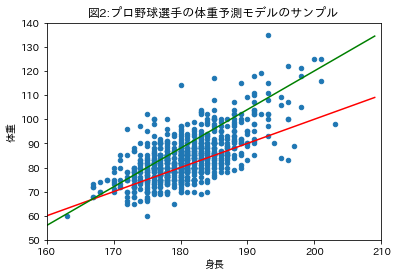

In [3]:
# プロ野球選手データの散布図を描画
baseball.plot(kind='scatter', x='身長', y='体重', title='図2:プロ野球選手の体重予測モデルのサンプル')
plt.xlim(160, 210)
plt.ylim(50, 140)
x_data = np.arange(150, 210)

# サンプルモデル1の回帰直線
model1 = 1.0 * x_data - 100
plt.plot(x_data, model1, color='red')

# サンプルモデル2の回帰直線
model2 = 1.6 * x_data - 200
plt.plot(x_data, model2, color='green')

In [4]:
import copy


def rss(data):
    """
    二乗和誤差
    :param data: データ
    :return:  二乗和誤差
    """
    result = 0

    for i in data.iterrows():
        result += (i[1]['体重'] - i[1]['予測値']) ** 2

    return result


# サンプルモデル1の二乗和誤差
rss_model1 = copy.deepcopy(baseball)
rss_model1['予測値'] = 1.0 * rss_model1['身長'] - 100

# サンプルモデル2の二乗和誤差
rss_model2 = copy.deepcopy(baseball)
rss_model2['予測値'] = 1.6 * rss_model2['身長'] - 200

pd.DataFrame([[rss(rss_model1)], [rss(rss_model2)]], index=['サンプルモデル1', 'サンプルモデル2'], columns=['二乗和誤差'])

,二乗和誤差
サンプルモデル1,51584.00
サンプルモデル2,69407.76


In [5]:
def cov(x, y):
    """
    共分散を求める
    :param x: 標本x
    :param y: 標本y
    :return: 共分散
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    n = len(x)
    c = 0.0

    for i in range(n):
        x_i = x[i]
        y_i = y[i]
        c += (x_i - x_mean) * (y_i - y_mean)

    return c / n


def std(x):
    """
    標準偏差を求める
    :param x: 標本
    :return: 標準偏差
    """
    mu = np.mean(x)
    _std = 0.0
    n = len(x)

    # 平均と要素の差を取って2乗する
    for i in range(n):
        _std += (x[i] - mu) ** 2

    # 要素数で割る
    _std = _std / n

    # これが標準偏差の2乗になる
    # 最後に平方根を取れば標準偏差になる
    return np.sqrt(_std)


def slope(x, y):
    """
    係数aの計算
    :param x:
    :param y:
    :return:
    """
    a = cov(x, y) / (std(x) ** 2)
    return a


slope(baseball['身長'], baseball['体重'])

1.1483324728293933

In [6]:
def intercept(x, y):
    """
    切片bの計算
    :param x:
    :param y:
    :return:
    """
    mean_x = np.array(x).mean()
    mean_y = np.array(y).mean()
    a = slope(x, y)
    b = mean_y - mean_x * a
    return b


intercept(baseball['身長'], baseball['体重'])

-123.55389965216311

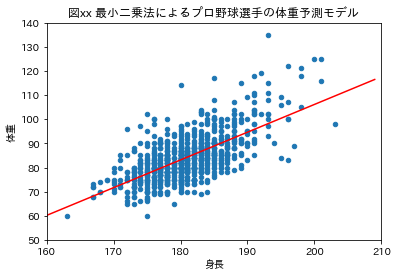

In [7]:
import copy

# 最小二乗法により係数aと切片bを求める
a = slope(baseball['身長'], baseball['体重'])
b = intercept(baseball['身長'], baseball['体重'])
x_data = np.arange(150, 210)
y_data = a * x_data + b

# 最小二乗法により求めた回帰直線の描画
baseball.plot(kind='scatter', x='身長', y='体重', title='図xx 最小二乗法によるプロ野球選手の体重予測モデル')
plt.xlim(160, 210)
plt.ylim(50, 140)
plt.plot(x_data, y_data, color='red')

In [8]:
# 最小二乗法の二乗和誤差
baseball_lsm = copy.deepcopy(baseball)
baseball_lsm['予測値'] = a * baseball_lsm['身長'] + b
rss(baseball_lsm)

42352.563527259306

9849.202704382846

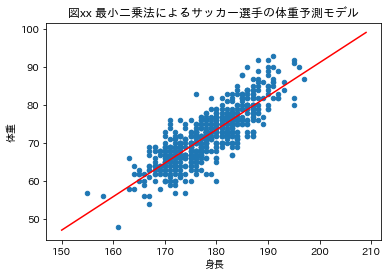

In [9]:
# 正解例

import copy

# サッカー選手データの散布図を描画
soccer = pd.read_csv('../../9_data/サッカー/Jリーグ選手身長体重.csv')[['身長', '体重']]
soccer.plot(kind='scatter', x='身長', y='体重', title='図xx 最小二乗法によるサッカー選手の体重予測モデル')

# 最小二乗法により回帰直線を求める
a = slope(soccer['身長'], soccer['体重'])
b = intercept(soccer['身長'], soccer['体重'])
x_data = np.arange(150, 210)
y_data = a * x_data + b
plt.plot(x_data, y_data, color='red')

# サッカー選手の体重予測モデルの二乗和誤差
soccer_lsm = copy.deepcopy(soccer)
soccer_lsm['予測値'] = a * soccer_lsm['身長'] + b
rss(soccer_lsm)

22967.838461538468

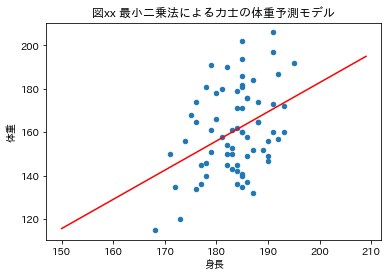

In [10]:
# 正解例

import copy

# 力士データの散布図を描画
sumou = pd.read_csv('../../9_data/相撲/力士身長体重.csv')[['身長', '体重']]
sumou.plot(kind='scatter', x='身長', y='体重', title='図xx 最小二乗法による力士の体重予測モデル')

# 最小二乗法により回帰直線を求める
a = slope(sumou['身長'], sumou['体重'])
b = intercept(sumou['身長'], sumou['体重'])
x_data = np.arange(150, 210)
y_data = a * x_data + b
plt.plot(x_data, y_data, color='red')

# 力士の体重予測モデルの二乗和誤差
sumou_lsm = copy.deepcopy(sumou)
sumou_lsm['予測値'] = a * sumou_lsm['身長'] + b
rss(sumou_lsm)